In [6]:
import os
import pandas as pd

dir = os.listdir('./results')
g = [dir[:1]]
[g[-1].append(y) if x[0:2] == y[0:2] else g.append([y]) for x, y in zip(dir[:-1], dir[1:])]
dirs = g
dirs

[['北京_0.csv',
  '北京_10.csv',
  '北京_15.csv',
  '北京_20.csv',
  '北京_25.csv',
  '北京_30.csv',
  '北京_35.csv',
  '北京_5.csv'],
 ['天津_0.csv',
  '天津_10.csv',
  '天津_15.csv',
  '天津_20.csv',
  '天津_25.csv',
  '天津_30.csv',
  '天津_35.csv',
  '天津_5.csv'],
 ['河北_0.csv',
  '河北_10.csv',
  '河北_15.csv',
  '河北_20.csv',
  '河北_25.csv',
  '河北_30.csv',
  '河北_35.csv',
  '河北_5.csv']]

In [2]:
from os.path import exists
from os import makedirs

MERGES_DIR = 'merges'
exists(MERGES_DIR) or makedirs(MERGES_DIR)

for i in dirs:
    df = pd.read_csv('./results/'+i[0]).iloc[:,:2]
    for j in i:
        df1 = pd.read_csv('./results/'+j)
        df = pd.concat([df,df1.iloc[:,2:]], axis=1)
    df.to_csv('./{}/'.format(MERGES_DIR)+i[0][0:2]+'.csv',index=False)

In [3]:
import pandas as pd
from os.path import exists
from os import makedirs

MERGES_DIR = 'merges'
exists(MERGES_DIR) or makedirs(MERGES_DIR)

df1 = pd.DataFrame()
for i in os.listdir('./'+MERGES_DIR):
    df = pd.read_csv('./{}/{}'.format(MERGES_DIR,i))
    df['indexs'] =  pd.to_datetime(df['time'])
    df = df.set_index('indexs',inplace = False)
    # print(df)
    df = df.resample('Y').sum(numeric_only=True)
    area = i.replace('.csv','')
    df['area'] = [area for j in range(df.shape[0])]
    # df.resample('Y').sum().to_csv(i)
    df1 = pd.concat([df1, df])

df1.to_csv('./bth.csv')

In [4]:
import pandas as pd

df = pd.read_csv('./bth.csv')
# df['year'] = df.index.str[0:4]
# df = df.reset_index
df = df.sort_values(by=['indexs','area'], ascending=[True,True])
x = 6
test = df.iloc[x:x+3,1:-1]
df.iloc[x:x+3,:]

,indexs,大数据,人工智能,区块链,云计算,生物识别,流计算,移动互联,第三方支付,在线支付,...,互联网理财,互联网保险,互联网金融,金融科技,物联网,分布式,数字化,智能化,点对点网络,area
2,2013-12-31,146752,82537,0,138945,14363,12271,33664,53526,32947,...,1873,1163,68969,1569,140265,8901,31255,22497,6716,北京
12,2013-12-31,45214,48472,0,47818,2243,460,13597,28852,19396,...,686,58,23015,171,55940,2363,13383,11143,1775,天津
22,2013-12-31,43654,54022,0,50994,2810,456,14654,33471,22957,...,995,516,24279,286,60046,3801,16645,11853,3031,河北


In [1]:
# import requests
# import json
# from datetime import date, timedelta
# import pandas as pd


# class DownloadBaiDuIndex(object):
#     def __init__(self, cookie):
#         self.cookie = cookie
#         self.headers = {
#             "Connection": "keep-alive",
#             "Accept": "application/json, text/plain, */*",
#             "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36",
#             "Sec-Fetch-Site": "same-origin",
#             "Sec-Fetch-Mode": "cors",
#             "Sec-Fetch-Dest": "empty",
#             "Referer": "https://index.baidu.com/v2/main/index.html",
#             "Accept-Language": "zh-CN,zh;q=0.9",
#             'Cookie': self.cookie,
#             "Host": "index.baidu.com",
#             "X-Requested-With": "XMLHttpRequest",
#             "Cipher-Text": "1656572408684_1656582701256_Nvm1pABkNsfD7V9VhZSzzFiFKylr3l5NR3YDrmHmH9yfFicm+Z9kmmwKVqVV6unvzAEh5hgXmgelP+OyOeaK8F21LyRVX1BDjxm+ezsglwoe1yfp6lEpuvu5Iggg1dz3PLF8e2II0e80ocXeU0jQFBhSbnB2wjhKl57JggTej12CzuL+h9eeVWdaMO4DSBWU2XX6PfbN8pv9+cdfFhVRHCzb0BJBU3iccoFczwNQUvzLn0nZsu0YPtG5DxDkGlRlZrCfKMtqKAe1tXQhg3+Oww4N3CQUM+6A/tKZA7jfRE6CGTFetC7QQyKlD7nxabkQ5CReAhFYAFAVYJ+sEqmY5pke8s3+RZ6jR7ASOih6Afl35EArbJzzLpnNPgrPCHoJiDUlECJveul7P5vvXl/O/Q==",

#         }

#     def decrypt(self, ptbk, index_data):
#         n = len(ptbk) // 2
#         a = dict(zip(ptbk[:n], ptbk[n:]))
#         return "".join([a[s] for s in index_data])

#     def get_index_data_json(self, keys, start=None, end=None):
#         words = [[{"name": key, "wordType": 1}] for key in keys]
#         words = str(words).replace(" ", "").replace("'", "\"")

#         url = f'http://index.baidu.com/api/SearchApi/index?area=0&word={words}&area=0&startDate={start}&endDate={end}'
#         print(words, start, end)
#         res = requests.get(url, headers=self.headers)
#         data = res.json()['data']
#         uniqid = data['uniqid']
#         url = f'http://index.baidu.com/Interface/ptbk?uniqid={uniqid}'
#         res = requests.get(url, headers=self.headers)
#         ptbk = res.json()['data']
#         result = {}
#         result["startDate"] = start
#         result["endDate"] = end
#         for userIndexe in data['userIndexes']:
#             name = userIndexe['word'][0]['name']
#             tmp = {}
#             index_all = userIndexe['all']['data']
#             index_all_data = [int(e) for e in self.decrypt(ptbk, index_all).split(",")]
#             tmp["all"] = index_all_data
#             index_pc = userIndexe['pc']['data']
#             index_pc_data = [int(e) for e in self.decrypt(ptbk, index_pc).split(",")]
#             tmp["pc"] = index_pc_data
#             index_wise = userIndexe['wise']['data']
#             index_wise_data = [int(e)
#                                for e in self.decrypt(ptbk, index_wise).split(",")]
#             tmp["wise"] = index_wise_data
#             result[name] = tmp
#         return result

#     def GetIndex(self, keys, start=None, end=None):
#         today = date.today()
#         if start is None:
#             start = str(today - timedelta(days=8))
#         if end is None:
#             end = str(today - timedelta(days=2))

#         try:
#             raw_data = self.get_index_data_json(keys=keys, start=start, end=end)
#             raw_data = pd.DataFrame(raw_data[keys[0]])
#             raw_data.index = pd.date_range(start=start, end=end)

#         except Exception as e:
#             print(e)
#             raw_data = pd.DataFrame({'all': [], 'pc': [], 'wise': []})

#         finally:
#             return raw_data


# cookie = 'BAIDUID=5CB30231196662724CE3F2CD27C1B426:FG=1; BAIDUID_BFESS=5CB30231196662724CE3F2CD27C1B426:FG=1; newlogin=1; BDUSS=FZwY3JUc1hYMlJFZVdOUEpZMH4xNndLVWZ2cHVQM1ducHA3T2dpS0xJM2tTQU5rSVFBQUFBJCQAAAAAAQAAAAEAAAAJNBQtyP3Uwl9zY3JhcHkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOS722Pku9tja; Hm_lvt_d101ea4d2a5c67dab98251f0b5de24dc=1676263263; Hm_up_d101ea4d2a5c67dab98251f0b5de24dc={"uid_":{"value":"5051266057","scope":1}}; bdindexid=1i5b0fcjv93geoei799tnn07v0; SIGNIN_UC=70a2711cf1d3d9b1a82d2f87d633bd8a042644833221CgF/af/m8LrCjwe2KfSSRSQPByyMNGwYSe5VBd8r0qToUM1rMsI9fvG3N76yaXFXmn2WDP4xQ06aR5kxKBhN7vrYQdS96og8f8JF+qsrCtHOdzJd5RnVA6I01fP9GciLGG0IdXfMu4Tbk1rFaI7Zh6w5lztAMqRkyw4Ch77Qnt0W4Nna9jU6JIrjsL3s5jCk8/KUHxsVGFwmpCxFB7FpBsfdAmOfdqbX9WE1hLoCpniR3AueIIyBlGVJD3sMdFVwDfJIp+FIT2N9/FbjIJGyyxsh1rbl5JMjqoAMjEhMaQ=17862942550376409269103581343364; __cas__rn__=426448332; __cas__st__212=51cb64bef0a44e8cc866657c1d8891bc2a23ee2686d576f3a6eadfd67014d821e31e04903e138f4275225e9b; __cas__id__212=45415758; CPID_212=45415758; CPTK_212=658038598; BIDUPSID=5CB30231196662724CE3F2CD27C1B426; PSTM=1676436503; BA_HECTOR=2h05a42l2g85850g8g8ha4bj1huop0p1l; ZFY=w6SIYO7nechMXco6A5nV68uSVBHpRSrZ3vso8vlok:BE:C; BDRCVFR[feWj1Vr5u3D]=I67x6TjHwwYf0; PSINO=5; delPer=0; H_PS_PSSID=38186_36542_37517_38091_38055_37910_38145_37989_38177_38170_37799_37927_38088_37900_26350_38136_38101_38008_37881; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; Hm_lpvt_d101ea4d2a5c67dab98251f0b5de24dc=1676436638; BDUSS_BFESS=FZwY3JUc1hYMlJFZVdOUEpZMH4xNndLVWZ2cHVQM1ducHA3T2dpS0xJM2tTQU5rSVFBQUFBJCQAAAAAAQAAAAEAAAAJNBQtyP3Uwl9zY3JhcHkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOS722Pku9tja; ab_sr=1.0.1_Y2IzNzFjYjA1Y2NkNTlhNDg5ZGQyZTI5MGRmMDZkOWRjY2I4NWUxMzc0MzYwMjUwZGZiYzdkNTJjZTQ0ODcyYzA4NDdhZmY5NzEyNWQ0NjUzMzRiZTA1NDM1ZmExNmM2NDg3MjYxMTczMjA0Zjc2ZDQwZjk0YzM2MTM2ODM2NTI0OGRhYjU5YTQ1ZjAyZWQ0NGZlOThmYjM2NmFmZDMyNg==; RT="z=1&dm=baidu.com&si=41530608-8ed0-42cb-bbcb-33a7ab8995eb&ss=le56n2zk&sl=4r&tt=2m4l&bcn=https://fclog.baidu.com/log/weirwood?type=perf&ld=25umw&nu=4irf3z7s&cl=1znaq"'

# # 初始化一个类
# downloadbaiduindex = DownloadBaiDuIndex(cookie=cookie)

# data = downloadbaiduindex.GetIndex(keys=['跨境支付平台'], start='2021-01-01', end='2021-11-12')

# data

import pandas as pd

df = pd.read_csv('./bth.csv', encoding="gbk")
df = df[['技', '支', '中', '名']]
df

,技,支,中,名
0,500209,108930,753605,0
1,497697,110573,681134,0
2,638166,142913,857195,73574
3,878176,200110,1501711,263337
4,1019910,233914,1824836,377865
5,1241150,306782,1427322,311311
6,1888488,351549,1305018,323009
7,2362577,373584,1404408,282120
8,1573753,295744,1007148,198614
9,1285083,387756,926532,211084


In [2]:
import numpy as np  # 导入numpy包并将其命名为np

##定义正向化的函数
def positivization(x,type,i):
# x：需要正向化处理的指标对应的原始向量
# typ：指标类型（1：极小型，2：中间型，3：区间型）
# i：正在处理的是原始矩阵的哪一列
    if type == 1:  #极小型
        print("第",i,"列是极小型，正向化中...")
        posit_x = x.max(0)-x
        print("第",i,"列极小型处理完成")
        print("--------------------------分隔--------------------------")
        return posit_x
    elif type == 2:  #中间型
        print("第",i,"列是中间型")
        best = int(input("请输入最佳值："))
        m = (abs(x-best)).max()
        posit_x = 1-abs(x-best)/m
        print("第",i,"列中间型处理完成")
        print("--------------------------分隔--------------------------")
        return posit_x
    elif type == 3:  #区间型
        print("第",i,"列是区间型")
        a,b = [int(l) for l in input("按顺序输入最佳区间的左右界，并用逗号隔开：").split(",")]
        m = (np.append(a-x.min(),x.max()-b)).max()
        x_row = x.shape[0]  #获取x的行数
        posit_x = np.zeros((x_row,1),dtype=float)
        for r in range(x_row):
            if x[r] < a:
               posit_x[r] = 1-(a-x[r])/m
            elif x[r] > b:
               posit_x[r] = 1-(x[r]-b)/m
            else:
               posit_x[r] = 1
        print("第",i,"列区间型处理完成")
        print("--------------------------分隔--------------------------")
        return posit_x.reshape(x_row)


## 第一步：从外部导入数据
#注：保证表格不包含除数字以外的内容
# x_mat = np.loadtxt('river.csv', encoding='UTF-8-sig', delimiter=',')  # 推荐使用csv格式文件
x_mat = df

## 第二步：判断是否需要正向化
n, m = x_mat.shape
print("共有", n, "个评价对象", m, "个评价指标")
judge = int(input("指标是否需要正向化处理，需要请输入1，不需要则输入0："))
if judge == 1:
    position = np.array([int(i) for i in input("请输入需要正向化处理的指标所在的列，例如第1、3、4列需要处理，则输入1,3,4").split(',')])
    position = position-1
    typ = np.array([int(j) for j in input("请按照顺序输入这些列的指标类型（1：极小型，2：中间型，3：区间型）格式同上").split(',')])
    for k in range(position.shape[0]):
        x_mat[:, position[k]] = positivization(x_mat[:, position[k]], typ[k], position[k])
    print("正向化后的矩阵：", x_mat)

## 第三步：对正向化后的矩阵进行标准化
tep_x1 = (x_mat * x_mat).sum(axis=0)  # 每个元素平方后按列相加
tep_x2 = np.tile(tep_x1, (n, 1))  # 将矩阵tep_x1平铺n行
Z = x_mat / ((tep_x2) ** 0.5)  # Z为标准化矩阵
print("标准化后的矩阵为：", Z)

## 第四步：计算与最大值和最小值的距离，并算出得分
tep_max = Z.max(0)  # 得到Z中每列的最大值
tep_min = Z.min(0)  # 每列的最小值
tep_a = Z - np.tile(tep_max, (n, 1))  # 将tep_max向下平铺n行,并与Z中的每个对应元素做差
tep_i = Z - np.tile(tep_min, (n, 1))  # 将tep_max向下平铺n行，并与Z中的每个对应元素做差
D_P = ((tep_a ** 2).sum(axis=1)) ** 0.5  # D+与最大值的距离向量
D_N = ((tep_i ** 2).sum(axis=1)) ** 0.5
S = D_N / (D_P + D_N)  # 未归一化的得分
std_S = S / S.sum(axis=0)
sorted_S = np.sort(std_S, axis=0)
print(std_S)  # 打印标准化后的得分
# std_S.to_csv(std_S.csv)  # 结果输出到std_S.csv文件

共有 30 个评价对象 4 个评价指标
标准化后的矩阵为：            技         支         中         名
0   0.104891  0.095550  0.149288  0.000000
1   0.104364  0.096991  0.134932  0.000000
2   0.133819  0.125359  0.169809  0.082354
3   0.184148  0.175531  0.297487  0.294763
4   0.213868  0.205183  0.361497  0.422958
5   0.260261  0.269100  0.282750  0.348462
6   0.396004  0.308369  0.258522  0.361556
7   0.495417  0.327697  0.278211  0.315787
8   0.330006  0.259418  0.199515  0.222316
9   0.269473  0.340128  0.183545  0.236274
10  0.031796  0.045846  0.059576  0.000000
11  0.033209  0.049921  0.059694  0.000000
12  0.050831  0.067516  0.090378  0.026786
13  0.069554  0.101004  0.158584  0.101907
14  0.070200  0.096373  0.145335  0.119026
15  0.079476  0.128498  0.112843  0.101237
16  0.097538  0.139376  0.106370  0.119960
17  0.128018  0.155200  0.112196  0.108678
18  0.109907  0.117637  0.085572  0.081600
19  0.100629  0.120536  0.078994  0.099932
20  0.037577  0.047977  0.112489  0.000000
21  0.040315  0.057398  

In [7]:
# pd.DataFrame(std_S).to_csv(std_S.csv)  # 结果输出到std_S.csv文件
# std_S.to_csv(std_S.csv)
std_S

0     0.016808
1     0.015639
2     0.025978
3     0.055608
4     0.067946
5     0.069339
6     0.083254
7     0.087097
8     0.061658
9     0.060294
10    0.000000
11    0.000597
12    0.006913
13    0.021245
14    0.021626
15    0.020359
16    0.023518
17    0.026000
18    0.018792
19    0.019681
20    0.007120
21    0.007220
22    0.011653
23    0.027491
24    0.034581
25    0.035216
26    0.046391
27    0.050116
28    0.036518
29    0.041341
dtype: float64

In [11]:
df_index = pd.DataFrame()
names = ['京', '津', '冀']
for na in names:
    ind = names.index(na)*10
    df_index[na] = list(std_S)[ind:ind+10]
df_index


,京,津,冀
0,0.016808,0.000000,0.007120
1,0.015639,0.000597,0.007220
2,0.025978,0.006913,0.011653
3,0.055608,0.021245,0.027491
4,0.067946,0.021626,0.034581
5,0.069339,0.020359,0.035216
6,0.083254,0.023518,0.046391
7,0.087097,0.026000,0.050116
8,0.061658,0.018792,0.036518
9,0.060294,0.019681,0.041341


In [12]:
df_index.to_csv('indexs.csv')

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# 数据标准化
def get_stand(data, name_list):
    scaler = MinMaxScaler()
    if name_list == None:
        x_sta = scaler.fit_transform(data) + 1e-10
    else:
        index_1 = [i for i, w in enumerate(name_list) if w == 1]
        # print(index_1)
        index_0 = [i for i, w in enumerate(name_list) if w == 0]
        # print(index_0)
        x_1 = data[:, index_1]
        x_sta1 = scaler.fit_transform(x_1) + 1e-10
        g = data[:, index_0]
        x_sta2 = (g.max(axis=0) - g) / (g.max(axis=0) - g.min(axis=0)) + 1e-10
        x_sta = np.hstack((x_sta1, x_sta2))
    # print(x_sta)
    return x_sta


def get_weights(data, name_list=None):
    """
    输入数据data，标准化后采用熵值法计算权重，综合得分以及排序位置
    """
    data = np.array(data)
    x_sta = get_stand(data, name_list)

    # 计算指标值占比
    w = x_sta/sum(x_sta)

    # 计算熵值
    k = 1/np.log(x_sta.shape[0])
    e = -k*(w*np.log(w)).sum(axis=0)
    # print('e信息熵',e)
    d = 1 - e
    ws = d/sum(d)
    # print('ws权重',ws)

    score = np.matmul(np.array(data), ws)
    # print('score综合评分',score)

    index = sorted(score, reverse=True)
    # print('index',index)

    # 输出名次结果
    sor = [index.index(score[l]) + 1 for l in range(len(index))]
    # print('sor',sor)

    results = {}
    results['weights'] = str(list(ws))
    results['score'] = str(list(score))
    results['pos'] = str(sor)
    # print('results',results)
    return score


if __name__ == '__main__':
    # data = pd.read_excel('./data/1234.xlsx', header=None)
    # df = np.array(test)
    # print(df)
    indexs = []

    for i in range(0,df.shape[0],3):
        x = i
        test = df.iloc[x:x+3,1:-1]
        # print(df.iloc[x:x+3,-3:])
        indexs.append(get_weights(test))
    df = pd.DataFrame(indexs,columns=['北京','天津','河北'])
    df['years'] = [str(i) for i in range(2011,2011+df.shape[0])]
    print(df)
    df.to_csv('./indexs.csv', index=False)

             北京            天津             河北 years
0  2.781031e+05  2.676024e+05  364137.111438  2011
1  7.604088e+05  9.238268e+05  858247.174034  2012
2  1.006996e+06  1.160700e+06  803823.054109  2013
3  7.026002e+05  1.268824e+05  129821.816015  2014
4  2.000246e+05  3.351038e+05  321575.986664  2015
5  2.838138e+05  3.075426e+05  354747.251649  2016
6  3.090202e+05  2.921599e+05  248150.642443  2017
7  2.241951e+05  2.782873e+05  455279.480681  2018
8  5.389380e+05  4.843067e+05  571148.224631  2019
9  7.388782e+05  5.811632e+05  586562.453014  2020


In [62]:
import pandas as pd

datas=[]
for i in range(2011,2021):
    df = pd.read_excel('./普惠金融datas.xlsx', sheet_name=str(i))
    # print(df.iloc[0:3,0:2]['总指数'].tolist())
    datas.append([str(i)]+df.iloc[0:3,0:2]['总指数'].tolist())
pd.DataFrame(datas,columns=['year','北京','天津','河北']).to_csv('ph_index.csv',index=False)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# print(os.path.abspath('.'))
# /Users/***********
#加载数据文件
df = pd.read_csv('./test.csv')
df.head(5)

df.astype('float').dtypes
df

,data,IGI,FTI,IFI,TPI
0,2011,0.376914,74889.09862,79.41,0.188799
1,2012,0.408770,57666.21303,150.65,0.193712
2,2013,0.383745,75328.77071,215.62,0.197480
3,2014,0.388761,126612.56670,235.36,0.197360
4,2015,0.389123,149478.09020,276.38,0.231554
5,2016,0.389514,144790.31680,286.37,0.236926
6,2017,0.388430,185096.70570,329.94,0.228375
7,2018,0.389621,241849.24780,368.54,0.225682
8,2019,0.391718,138784.35830,399.00,0.209005
9,2020,0.398478,107238.83060,417.88,0.197110


<AxesSubplot:xlabel='Date'>

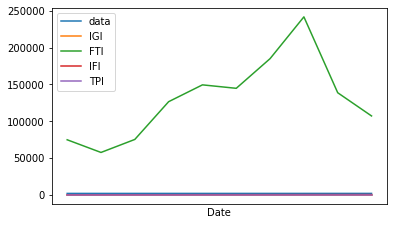

In [81]:
#第一列转为日期格式
df['Date']=pd.to_datetime(df['data'])
#日期列设为索引列
df.set_index('Date',inplace=True)
df.plot()

In [83]:
# from statsmodels.tsa import stattools
# from statsmodels.stats.diagnostic import unitroot_adf
# stattools.adfuller
from statsmodels.tsa.stattools import adfuller
#平稳性测试
v1 = adfuller(df['IGI'])
v2 = adfuller(df['FTI'])
v3= adfuller(df['IFI'])
v4= adfuller(df['TPI'])
print("v1平稳性",v1)
print("v2平稳性",v2)
print("v3平稳性", v3)
print("v4平稳性", v4)

v1平稳性 (1.9738237698523389, 0.9986379571421161, 3, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, -58.4684929019693)
v2平稳性 (-3.1462198042143257, 0.023316479088590327, 3, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 137.24133778292196)
v3平稳性 (-2.638480779045248, 0.08530197827303221, 0, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, 50.5034137100299)
v4平稳性 (-12.69053039819818, 1.1347443884467005e-23, 3, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, -52.97737581787314)
